#Pytorch computer vision

In [97]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

print(torch.__version__)

print(torchvision.__version__)


2.6.0+cu124
0.21.0+cu124


##Getting a data set

In [98]:
#Training data
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [99]:
len(train_data),len(test_data)

(60000, 10000)

In [100]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [101]:
image.shape

torch.Size([1, 28, 28])

In [102]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#Visualizing our data

In [103]:
class_names=train_data.classes

In [104]:
len(class_names)

10

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

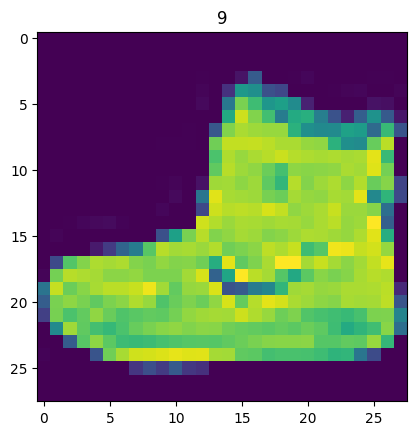

In [105]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

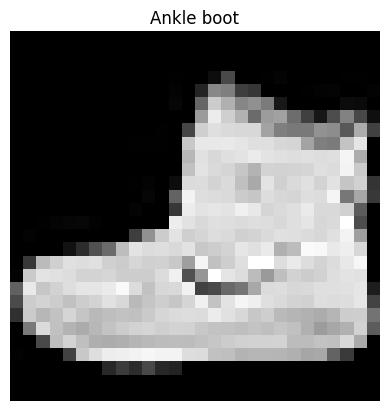

In [106]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

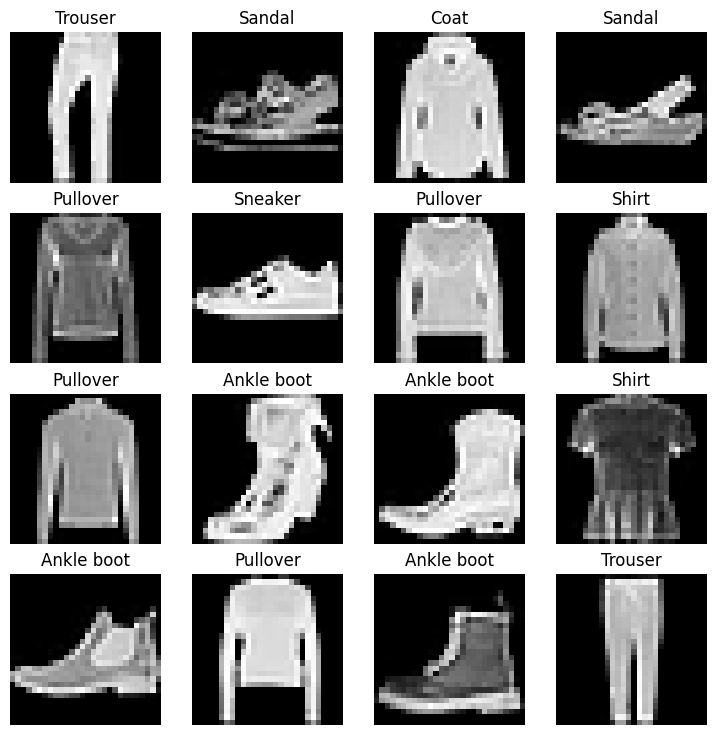

In [107]:
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis('off')

##Prepare data loader

In [108]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [109]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ef3610e9990>,
 <torch.utils.data.dataloader.DataLoader at 0x7ef360d04190>)

In [110]:
print(f"Data Loader:{train_dataloader,test_dataloader}")
print(f"Length of train dataloader:{len(train_dataloader)}")
print(f"Length of test data loader:{len(test_dataloader)}")

Data Loader:(<torch.utils.data.dataloader.DataLoader object at 0x7ef3610e9990>, <torch.utils.data.dataloader.DataLoader object at 0x7ef360d04190>)
Length of train dataloader:1875
Length of test data loader:313


In [111]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

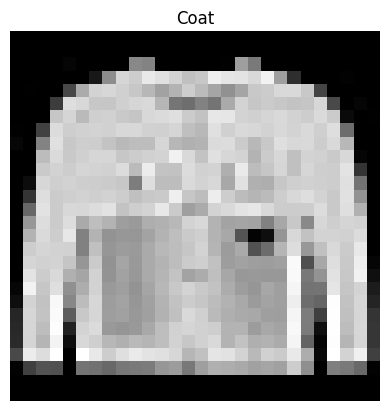

In [112]:
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Model

In [113]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [114]:
output=flatten_model(x)

print(f"Shape before falttening:{x.shape}")
print(f"Shape after flattening:{output.shape}")

Shape before falttening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [115]:
len(class_names)

10

In [116]:
from torch import nn
class FashionMNIST(nn.Module):
  def __init__(self,class_names):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=784,out_features=10),
        nn.Linear(in_features=10,out_features=len(class_names))
    )

  def forward(self,x):
    return self.layer_stack(x)

In [117]:
torch.manual_seed(42)
model_0=FashionMNIST(class_names=class_names)
model_0


FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [118]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [119]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py faile is already exist , skipping download")
else:
  print("Downloading helper_function.py......")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py faile is already exist , skipping download


In [120]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                                                    lr=0.1)

In [121]:
from timeit import default_timer as timer
def train_time(start:float,
               end:float,
               device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}:{total_time:.3f}seconds")

In [122]:
start_time=timer()
end_time=timer()
train_time(start=start_time,
           end=end_time,
           device="cpu")

Train time on cpu:0.000seconds


In [123]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")

  train_loss=0

  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(x)

    loss=loss_fn(y_pred,y)
    train_loss+=loss

    optimizer.zero_grad()


    loss.backward()

    optimizer.step()

    if batch % 400 ==0:
      print(f"Looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")

  train_loss /=len(train_dataloader)

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred=model_0(x_test)

      test_loss+=loss_fn(test_pred,y_test)

      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)

    test_acc/=len(test_dataloader)

  print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f} , Test accuracy:{test_acc:.4f}")

train_time_end_on_cpu=timer()



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.5904 | Test loss:0.5095 , Test accuracy:82.0387
Epoch:1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4763 | Test loss:0.4799 , Test accuracy:83.1969
Epoch:2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4550 | Test loss:0.4766 , Test accuracy:83.4265


In [124]:
train_time_of_model_0=train_time(start=train_time_start_on_cpu,
                            end=train_time_end_on_cpu,
                            device=str(next(model_0.parameters()).device))

Train time on cpu:32.019seconds


#Make prediction

In [125]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [126]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
  loss,acc=0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):

      x,y=x.to(device),y.to(device)

      y_pred=model(x)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return{
      "Model_name":model.__class__.__name__,
      "Model_loss":loss.item(),
      "Model_acc":acc
  }

model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           )
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNIST',
 'Model_loss': 0.47663894295692444,
 'Model_acc': 83.42651757188499}

#Device agnostic code

In [127]:
device

'cuda'

##Model 1


In [128]:
len(class_names)

10

In [129]:
class FashionMNIST_V1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=784,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=len(class_names)),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)

In [130]:
torch.manual_seed(42)
model_1=FashionMNIST_V1().to(device)

In [131]:
model_1

FashionMNIST_V1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [132]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [133]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_1.parameters(),
                          lr=0.1)

#Function for training and testing

In [134]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss , train_acc = 0 ,0

  model.train()

  for batch,(x,y) in enumerate(data_loader):

    x , y = x.to(device) , y.to(device)

    y_pred=model(x)

    loss=loss_fn(y_pred,y)

    acc=accuracy_fn(y_true=y,
                    y_pred=y_pred.argmax(dim=1))

    train_loss+=loss

    train_acc+=acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_acc/=len(data_loader)

  train_loss/=len(data_loader)
  print(f"Train loss:{train_loss:.4f} | Train accuracy:{train_acc:.2f}")

In [135]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss , test_acc =0 , 0
  model.eval()
  with torch.inference_mode():
    for x_test,y_test in data_loader:

      x_test , y_test = x_test.to(device) , y_test.to(device)

      test_pred=model(x_test)

      test_loss+=loss_fn(test_pred,
                       y_test)
      test_acc+=accuracy_fn(y_true=y_test,
                          y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss:{test_loss:.4f} | Test accuracy:{test_acc:.2f}%\n")

In [136]:

torch.manual_seed(42)

train_time_start_on_cuda=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}\n----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_stop_on_cuda=timer()



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:0
----
Train loss:1.0920 | Train accuracy:61.34
Test loss:0.9564 | Test accuracy:65.00%

Epochs:1
----
Train loss:0.7810 | Train accuracy:71.93
Test loss:0.7223 | Test accuracy:73.91%

Epochs:2
----
Train loss:0.6703 | Train accuracy:75.94
Test loss:0.6850 | Test accuracy:75.02%



In [137]:
train_time_of_model_1=train_time(start=train_time_start_on_cuda,
           end=train_time_stop_on_cuda,
           device=device)

Train time on cuda:27.975seconds


In [138]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNIST_V1',
 'Model_loss': 0.6850008964538574,
 'Model_acc': 75.01996805111821}

Model 2:Creating a convolutional neural network

In [139]:
class FashionMNIST_V2(nn.Module):
  def __init__(self,in_channels,hiddenchannels,out_channels):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=hiddenchannels,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hiddenchannels,
                  out_channels=hiddenchannels,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hiddenchannels,
                  out_channels=hiddenchannels,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hiddenchannels,
                  out_channels=hiddenchannels,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hiddenchannels*7*7,
                  out_features=out_channels))


  def forward(self,x):
    x=self.conv_block_1(x)
    # print(f"Output block of conv_block_1 :{x.shape}")
    x=self.conv_block_2(x)
    # print(f"Output block of conv_block_2 :{x.shape}")
    x=self.classifier(x)
    # print(f"Output block of classifier :{x.shape}")
    return x


In [140]:
torch.manual_seed(42)
model_2=FashionMNIST_V2(in_channels=1,hiddenchannels=10,out_channels=len(class_names)).to(device)


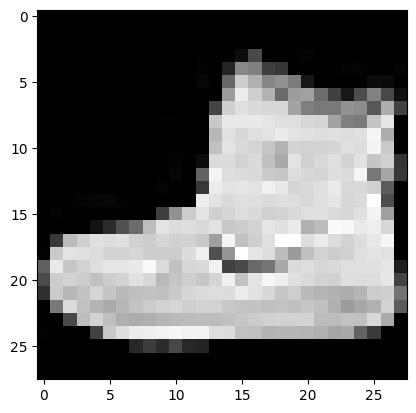

In [141]:
plt.imshow(image.squeeze(),cmap="gray")

In [142]:
rand_image_tensor=torch.randn(1,28,28)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [143]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [144]:
torch.manual_seed(42)

images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test images:\n{test_image}")

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test images:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [145]:
len(test_image)

3

In [146]:
test_image.unsqueeze(0).shape,test_image.squeeze().shape,test_image.shape

(torch.Size([1, 3, 64, 64]), torch.Size([3, 64, 64]), torch.Size([3, 64, 64]))

In [147]:
torch.manual_seed(42)
conv_layes=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=0)

conv_output=conv_layes(test_image)
conv_output


tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

##making loass function

In [148]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [149]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_model_2=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}.....")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_model_2=timer()
train_time_of_model_2=train_time(start=train_time_start_on_model_2,
                                 end=train_time_end_on_model_2,
                                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:0.....
Train loss:0.5931 | Train accuracy:78.33
Test loss:0.4010 | Test accuracy:85.69%

Epochs:1.....
Train loss:0.3615 | Train accuracy:86.84
Test loss:0.3423 | Test accuracy:87.32%

Epochs:2.....
Train loss:0.3209 | Train accuracy:88.38
Test loss:0.3217 | Test accuracy:88.43%

Train time on cuda:33.973seconds


In [150]:
train_time_of_model_2

In [151]:
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNIST_V2',
 'Model_loss': 0.3217291831970215,
 'Model_acc': 88.4285143769968}

In [152]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [153]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,Model_name,Model_loss,Model_acc
0,FashionMNIST,0.476639,83.426518
1,FashionMNIST_V1,0.685001,75.019968
2,FashionMNIST_V2,0.321729,88.428514


In [154]:
compare_results["training_time"]=[train_time_of_model_0,
                                  train_time_of_model_1,
                                  train_time_of_model_2]
compare_results


,Model_name,Model_loss,Model_acc,training_time
0,FashionMNIST,0.476639,83.426518,None
1,FashionMNIST_V1,0.685001,75.019968,None
2,FashionMNIST_V2,0.321729,88.428514,None


Text(0, 0.5, 'model')

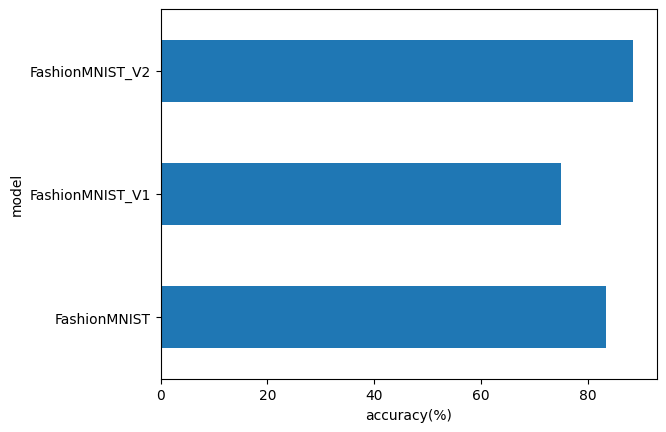

In [155]:
compare_results.set_index("Model_name")["Model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## Make and evaluvate

In [156]:
def make_prediction(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)

      pred_logit=model(sample)

      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())


  return torch.stack(pred_probs)


In [157]:
import random
# random.seed(42)
test_sample = []
test_label = []
for sample , label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_label.append(label)

test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

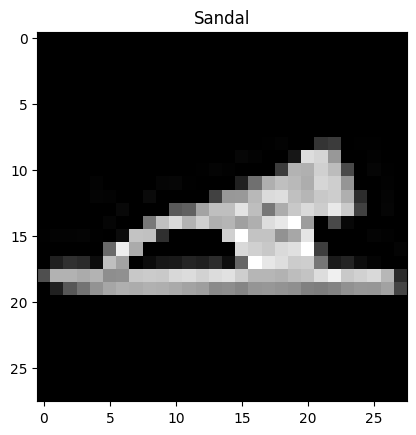

In [158]:
plt.imshow(test_sample[0].squeeze(),cmap="gray")
plt.title(class_names[test_label[0]])

#Make prediction

In [159]:
pred_probs=make_prediction(model=model_2,
                           data=test_sample)
pred_probs[:3]

tensor([[9.0399e-05, 1.0484e-06, 4.4105e-06, 2.6069e-05, 8.3535e-06, 9.9913e-01,
         2.9973e-05, 2.8634e-04, 3.9693e-04, 2.7434e-05],
        [4.5923e-03, 1.7981e-05, 6.0302e-04, 2.3061e-06, 1.1631e-04, 1.1879e-04,
         1.4377e-03, 2.8658e-04, 9.9262e-01, 2.0541e-04],
        [5.9815e-03, 1.9619e-02, 1.3175e-04, 9.6516e-01, 5.6632e-03, 8.3062e-05,
         5.9197e-04, 5.8616e-04, 1.5165e-03, 6.6577e-04]])

In [160]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 8, 3, 5, 7, 9, 0, 2, 0])

In [161]:
test_label

[5, 8, 3, 5, 9, 9, 0, 2, 6]

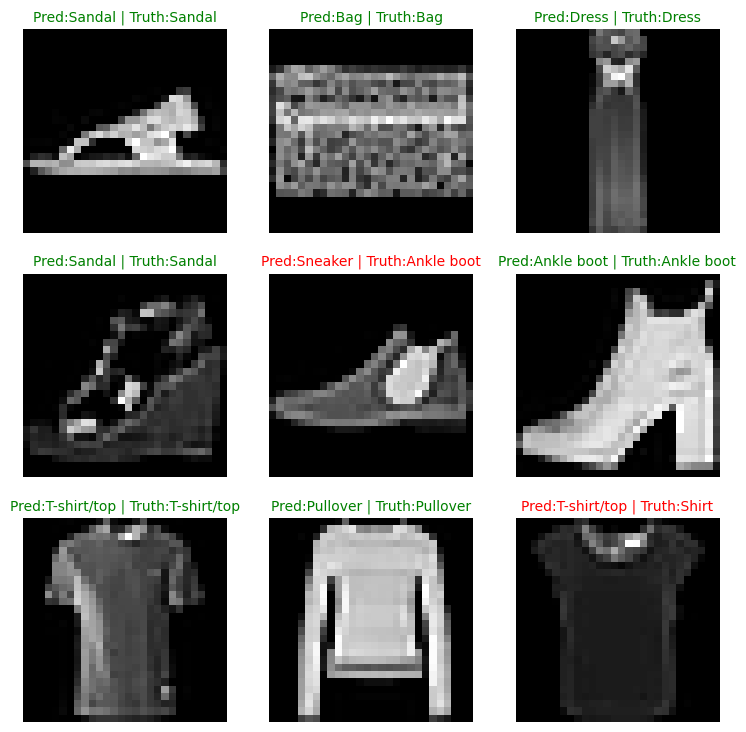

In [162]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_sample):
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.squeeze(),cmap="gray")

  pred_label=class_names[pred_classes[i]]

  truth_label = class_names[test_label[i]]

  title_text=f"Pred:{pred_label} | Truth:{truth_label}"

  if pred_label==truth_label:
    plt.title(title_text,fontsize=10, c ="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

#Confusion matrix

In [163]:
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="Making prediction..."):
    x,y=x.to(device),y.to(device)

    y_logits=model_2(x)

    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]


Making prediction...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 2, 6, 4, 4, 5, 6, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 6, 2, 6, 2, 3, 1, 2, 8, 4, 4, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 4, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 6, 4, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([8, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 8, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 4, 8, 6, 4,
        2, 4, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 6, 6, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [164]:
try:
  import torchmetrics, mlxtend
  print(f"mlextenf version:{mlxtenf.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>-19,"mlxtend version should be 0.19 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")

mlxtend version:0.23.4


In [165]:
mlxtend.__version__

'0.23.4'

In [166]:
import mlxtend

In [167]:
len(class_names),len(y_pred_tensor)

(10, 10000)

In [168]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

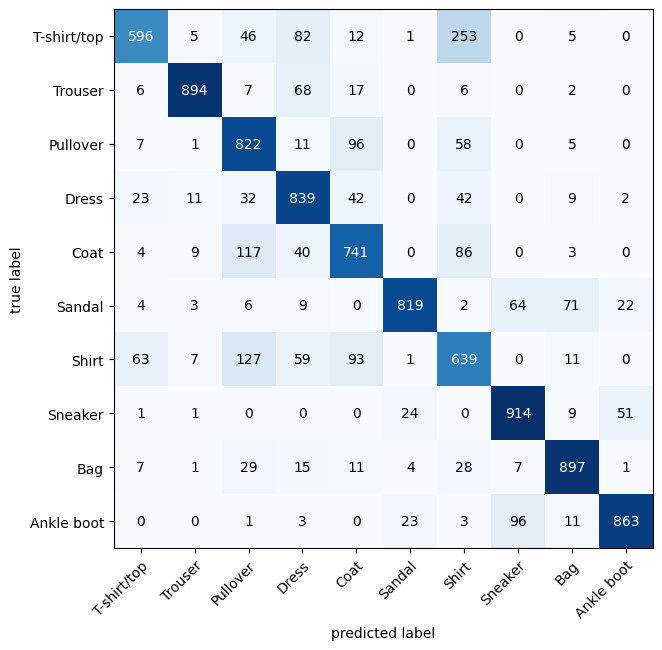

In [169]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_names),
                        task='multiclass')
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [170]:
confmat_tensor

tensor([[596,   5,  46,  82,  12,   1, 253,   0,   5,   0],
        [  6, 894,   7,  68,  17,   0,   6,   0,   2,   0],
        [  7,   1, 822,  11,  96,   0,  58,   0,   5,   0],
        [ 23,  11,  32, 839,  42,   0,  42,   0,   9,   2],
        [  4,   9, 117,  40, 741,   0,  86,   0,   3,   0],
        [  4,   3,   6,   9,   0, 819,   2,  64,  71,  22],
        [ 63,   7, 127,  59,  93,   1, 639,   0,  11,   0],
        [  1,   1,   0,   0,   0,  24,   0, 914,   9,  51],
        [  7,   1,  29,  15,  11,   4,  28,   7, 897,   1],
        [  0,   0,   1,   3,   0,  23,   3,  96,  11, 863]])

#Sava and load

In [171]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME="03__pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/03__pytorch_computer_vision_model_2.pth


In [172]:
torch.manual_seed(42)
loaded_model_2=FashionMNIST_V2(in_channels=1,
                               hiddenchannels=10,
                               out_channels=len(class_names))
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNIST_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#Evaluate loaded model

In [173]:
model_2_results

{'Model_name': 'FashionMNIST_V2',
 'Model_loss': 0.3217291831970215,
 'Model_acc': 88.4285143769968}

In [174]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn

)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNIST_V2',
 'Model_loss': 0.3217291831970215,
 'Model_acc': 88.4285143769968}

In [175]:
model_2_results

{'Model_name': 'FashionMNIST_V2',
 'Model_loss': 0.3217291831970215,
 'Model_acc': 88.4285143769968}

In [176]:
torch.isclose(torch.tensor(model_2_results["Model_loss"]),
              torch.tensor(loaded_model_2_results["Model_loss"]),
              atol=1e-02)

tensor(True)

In [177]:
# [IN COLAB NOTEBOOK - LAST CELL]
from IPython.display import display, Javascript
display(Javascript('''
  Array.from(document.querySelectorAll('.jp-OutputArea-output'))
    .forEach(el => el.remove());
'''))

# Then clear outputs manually
from google.colab import output
output.clear()

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
import os
from google.colab import drive

# Mount Google Drive (if your notebook is saved there)
drive.mount('/content/drive')

# Get the current notebook's path (works for files in Colab's temporary storage)
notebook_path = !ls /content/drive/My\ Drive/Colab\ Notebooks/ *.ipynb 2>/dev/null || ls *.ipynb
notebook_name = notebook_path[0] if notebook_path else "Notebook not found"

print("Current notebook filename:", notebook_name)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current notebook filename: '/content/drive/My Drive/Colab Notebooks/':
